In [ ]:
# 2017 S2 FIT5211 Assignment 2
# Duo Pan
# 27554074

In [76]:

from math import *
import random

class Point:
    # constructor
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    # distance to (0,0)
    def distance_from_origin(self):
        return sqrt(self.x * self.x + self.y * self.y)
    
    # normal distance between self and other point
    def distance(self, other):
        dx = self.x - other.x
        dy = self.y - other.y
        return sqrt(dx * dx + dy * dy)
    
    # reset x,y after translate
    def translate(self, dx, dy):
        self.x += dx
        self.y += dy
    
    # make it can be printed as a string
    def __str__(self):
        return "(" + str(self.x) + ", " + str(self.y) + ")"
    
    # make the class can be compare, and it makes sort easily.
    def __eq__(self, other):
        return self.x == other.x and self.y == other.y
    
    def __gt__(self, other):
        return self.x > other.x or (self.x == other.x and self.y > other.y)
    
    def __lt__(self, other):
        return self.x < other.x or (self.x == other.x and self.y < other.y)
    
    # Manhattan distance
    def manhattan(self, other):
        return abs(self.x - other.x) + abs(self.y - other.y)
    

class PointSet:
    # constructor
    def __init__(self, init=None):
        if init is None:
            self.contents = []
        else:
            self.contents = init  
    
    # get length
    def __len__(self):
        return len(self.contents)
    
    # print all points in this set
    def display(self):
        for item in self.contents:
            print(item)
    
    # is empty
    def is_empty(self):
        return self.contents == []
    
    # binary search, get the right index, called by insert() and remove()
    # return index and 0/1, 0 means not find, 1 means find
    def findPosition(self, elem):
        low = 0  
        high = len(self) - 1  
        while low <= high:  
            mid = (high + low) // 2  
            if self.contents[mid] == elem:  
                return mid, 1  
            elif self.contents[mid] > elem:  
                high = mid - 1  
            else:  
                low = mid + 1  
        return low, 0
    
    # insert Point by x ascending order first, then y ascending
    def insert(self, elem):
        index, isfind = self.findPosition(elem)  
        if isfind == 1:
            # do not accept 2 points with the same x,y
            return False
        else:
            self.contents.insert(index, elem) 
            return True
    
    # remove elem from the set
    def remove(self, elem):
        index, isfind = self.findPosition(elem) 
        if isfind == 1:
            self.contents.pop(index)
        else:
            print(elem,end=' ')
            print("is not in the set")
        
    # clear the point set
    def removeAll(self):
        self.contents = []
            
    # get x list, used for plot
    def getXS(self):
        xs = []
        for item in self.contents:
            xs.append(item.x)
        return xs
     
    # get y list, used for plot
    def getYS(self):
        ys = []
        for item in self.contents:
            ys.append(item.y)
        return ys      

    
R = 100
# randomly generate some points and store in the set
def createRandomPoints(number):
    ps = PointSet()
    for i in range(0,number):
        point = Point(random.randint(0,R),random.randint(0,R))
        if ps.insert(point) == False:
            i -= 1
    return ps
    
pointSet = createRandomPoints(10)
pointSet.display()

(14, 64)
(16, 6)
(18, 48)
(39, 1)
(44, 80)
(47, 30)
(54, 64)
(65, 36)
(83, 85)
(95, 47)


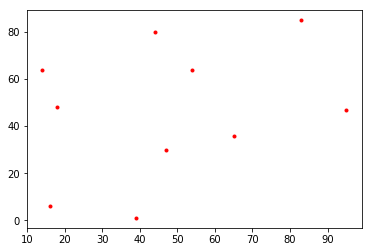

In [77]:
import matplotlib.pyplot as plt
plt.plot(pointSet.getXS(), pointSet.getYS(),'ro',marker='.')
plt.show()

In [78]:
class Partition:
    def __init__(self):
        self.parent = dict()
        self.rank = dict()
    
    def make_partition(self):
        pass
        
    def make_set(self,x):
        self.parent[x] = x
        self.rank[x] = 0
        
    def find(self,x):
        if x != self.parent[x]:
            self.parent[x] = self.find(self.parent[x])
        return self.parent[x]
    
    def union(self,x, y):
        A = self.find(x)
        B = self.find(y)
        if self.rank[A] < self.rank[B]:
            self.parent[B] = A
        else:
            self.parent[A] = B
            if self.rank[A] == self.rank[B]:
                self.rank[B] = self.rank[B] + 1
                
                
        

In [80]:
partition = Partition()

def kruskal(graph):
    E = list(graph['edges'])
    E.sort()
    F = {}
    F['vertices'] = graph['vertices']
    F['edges'] = set([])
    total = 0
    for f in F['vertices']:
        partition.make_set(f)
    for i in range(0,len(E)):
        u = E[i][1]
        v = E[i][2]
        if partition.find(u) != partition.find(v):
            partition.union(u,v)
            F['edges'].add(E[i])
            total += E[i][0]
    
    return F, total

graph = {
'vertices': [i for i in range (0,len(pointSet.contents))],
'edges': set([])
}

for i in range (0,len(pointSet.contents)):
    for j in range (i+1,len(pointSet.contents)):
        e = round(pointSet.contents[i].distance(pointSet.contents[j]),4)
        graph['edges'].add((e,i,j))

tree, total = kruskal(graph)
print(tree)
print('total weights: ', total)




{'vertices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 'edges': {(34.0, 0, 4), (31.9531, 7, 9), (18.9737, 5, 7), (30.0832, 6, 7), (35.805, 6, 8), (16.4924, 0, 2), (30.0832, 3, 5), (23.5372, 1, 3), (18.868, 4, 6)}}
total weights:  239.7958


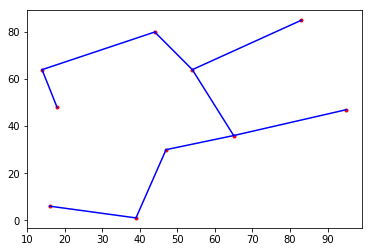

In [82]:
import matplotlib.pyplot as plt
plt.plot(pointSet.getXS(), pointSet.getYS(),'ro',marker='.')
for e in tree['edges']: 
    plt.plot([pointSet.contents[e[1]].x,pointSet.contents[e[2]].x],[pointSet.contents[e[1]].y,pointSet.contents[e[2]].y],'b')
plt.show()

In [64]:
print(pointSet.contents[0].x)

0
